In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv('Uber Drives.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Check for Missing Values

if a data is not available, Python uses NaN to represnet it.

Lets' check below if there data points missing in our dataset.

In [3]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [4]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

We will drop all the NaN values in our dataset.

NOTE: Dropping a value in your dataset should be the last option to consider. There are better ways to deal with missing values in your dataset.

tere is a detail and well explained tutorial on dealing with missing values and other featuring engineering techniques.

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [7]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [8]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [9]:
hour = []
day = []
dayofweek = []
month = []
weekdate = []
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekdate.append(calendar.day_name[dayofweek[-1]])
data['HOUR'] = hour
data['DAY'] = day
data['DAY_OF_WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Categories We Have

In [12]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

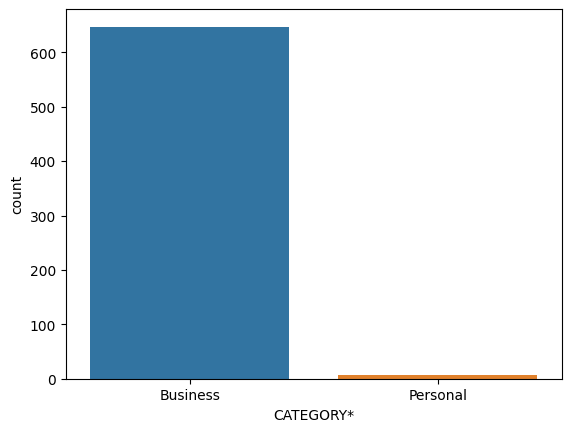

In [13]:
sns.countplot(x = 'CATEGORY*', data = data)

We have large number of business rides category as against vey few personal rides.

### **How long do people travel with Uber**

<Axes: ylabel='Frequency'>

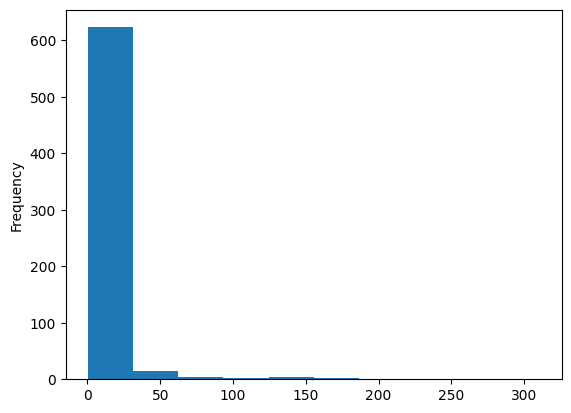

In [14]:
data['MILES*'].plot.hist()

moslty people travel in a short mile with Uber.

#### **What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Nubmer of trips Vs hours')

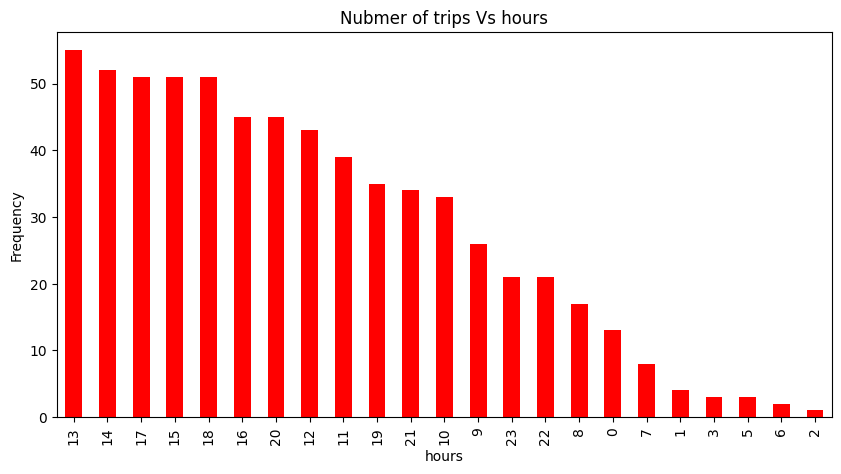

In [16]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color='red', figsize=
           (10,5))
plt.xlabel('hours')
plt.ylabel('Frequency')
plt.title('Nubmer of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2am.

### **Check The Purpose Of Trips**

<Axes: >

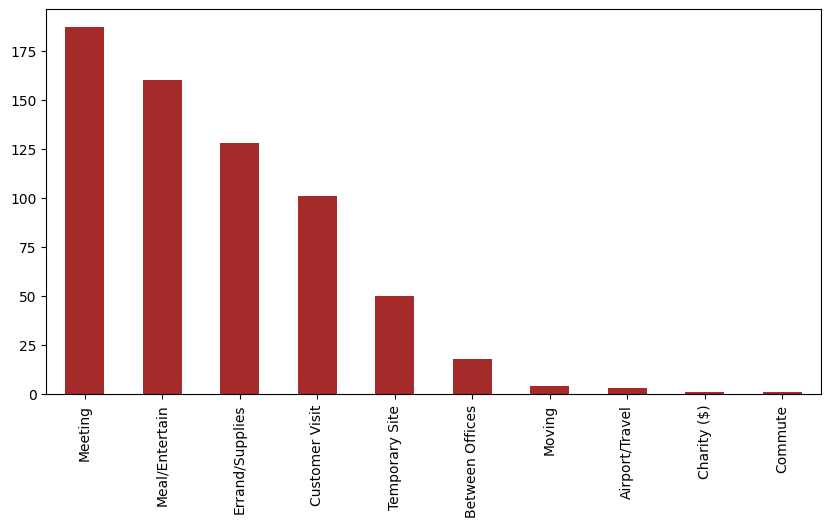

In [17]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10, 5), color='brown')

We can notic that mostly the purpose of the trip is meeting and meal/entertain.

### **Which Day Has The Highest Number Of Trips**

<Axes: >

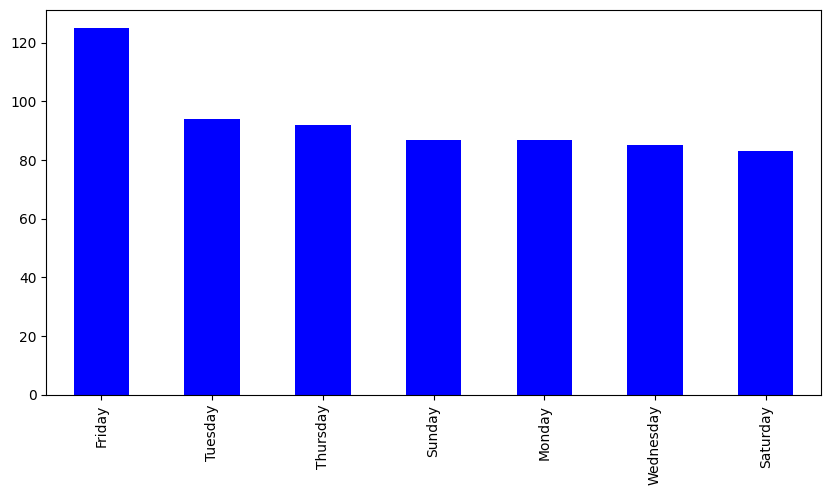

In [20]:
data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')

So Friday has the highest number of Trips.

### **What are the number of trips per each day**

<Axes: >

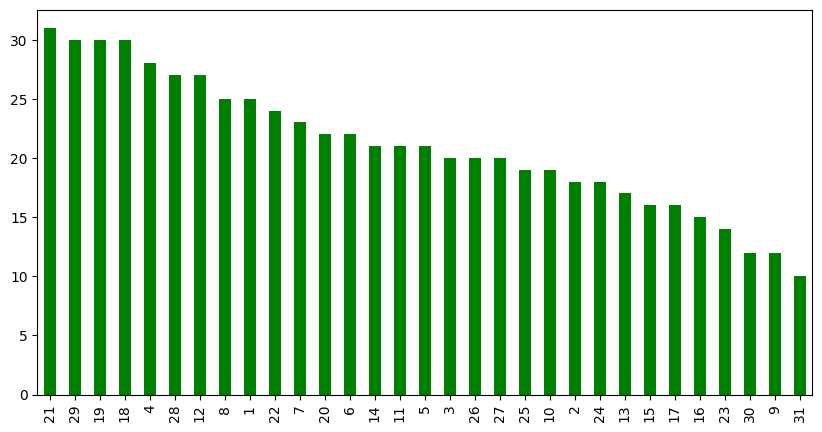

In [23]:
data['DAY'].value_counts().plot(kind='bar', figsize=(10, 5), color='green')

### **What are the trips in the month**

<Axes: >

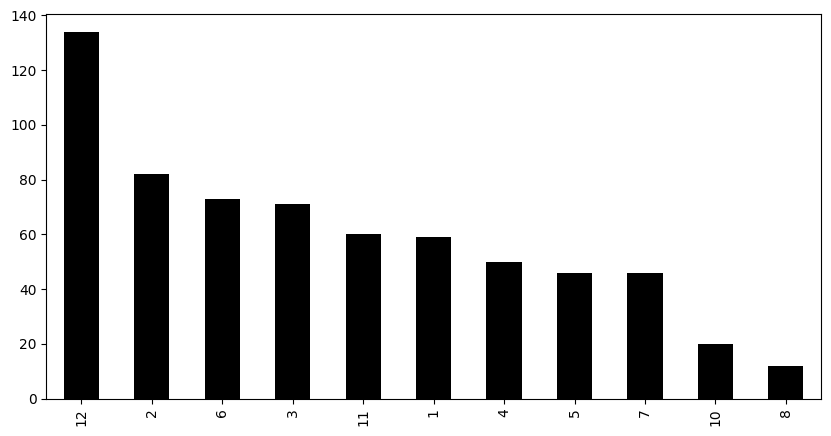

In [25]:
data['MONTH'].value_counts().plot(kind='bar', figsize=(10, 5), color='black')

We can see that December(12) has the most trips.

#### **The starting points of trips. Where do people start boarding their trop from most**

<Axes: >

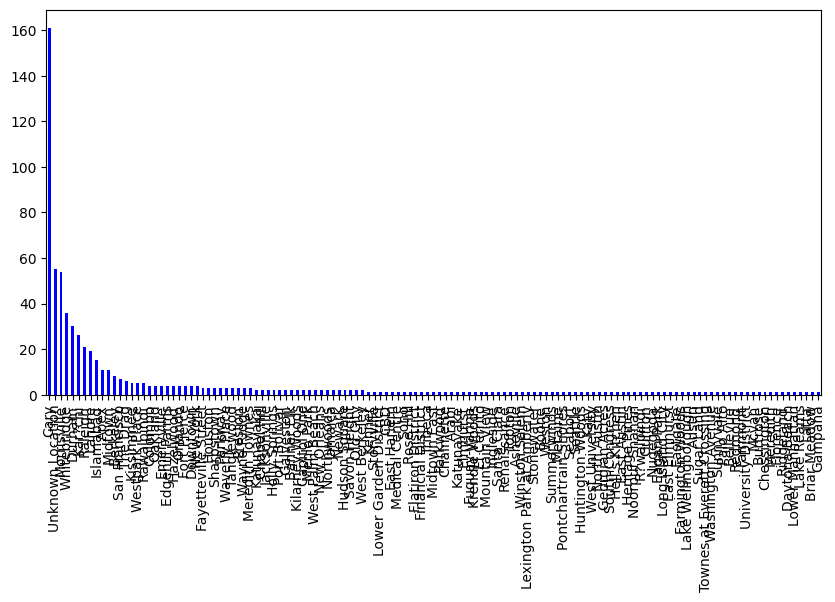

In [27]:
data['START*'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')

Most people in this dataset starts their journey from Cary followed by some unknown location and then Morrisville.